# Homework 1: Bifurcation diagram
by Rustam Guseyn-zade ([link canvas](https://skoltech.instructure.com/courses/3546/users/9673))

## Table of contents
* [Evolution of x](#Evolution-of-x-($x_0$-and-$r$-is-constant))
* [Playing around with r](#Evolution-of-x-(only-$x_0$-is-constant,-playing-around-with-visulaization))
* [Bifurcation map](#Bifurcation-map)

In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Evolution of x ($x_0$ and $r$ is constant)

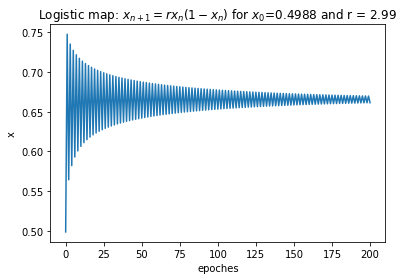

In [2]:
epoches = 200
r = 2.99

x = [np.random.rand()]

for i in range(epoches):
    x = np.append(x, r * x[i] * (1-x[i]))

plt.title(r'Logistic map: $x_{n+1} = r x_{n} (1-x_{n})$ for $x_0$' + f'={float("{:.4f}".format(x[0]))} and r = {r}')
plt.ylabel('x')
plt.xlabel('epoches');
plt.plot(x);

## Evolution of x (only $x_0$ is constant, playing around with visulaization)

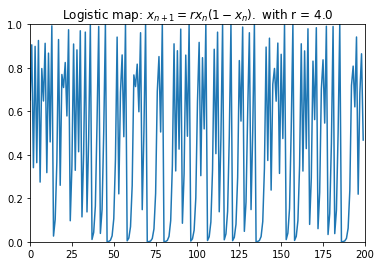

In [3]:
n = 200
m = 200
xs_amount = 1000

x_origin = np.random.rand()
x = [x_origin for _ in range(xs_amount)]
r = np.linspace(0, 4.0, num=xs_amount)
x_arrays = np.array([[] for _ in range(xs_amount)])

for i in range(1, n + m):
    inverted_x = 1 - np.array(x)
    updated_x = np.multiply(x, r)
    updated_x = np.multiply(updated_x, inverted_x)
    x = updated_x
    if i >= n:
        x_arrays = np.concatenate((x_arrays, np.array([x]).T), axis=1)


fig, ax=plt.subplots()
ax.axis([0,200,0,1])
line, = ax.plot([],[])

def animate(x_i):
    line.set_data(range(m), x_arrays[x_i])
    ax.set_title(r'Logistic map: $x_{n+1} = r x_{n} (1-x_{n}).$ with r = ' + f'{float("{:.4f}".format(r[x_i]))}')

ani = animation.FuncAnimation(fig,animate, frames=x_arrays.shape[0], interval=3, blit=False)
ani.save("evolution_of_x.gif",writer='pillow')
plt.show()

For some strange reason gif doesn't play in notebook, so you can check out it in directory after generation (file called **evolution_of_x.gif**)

## Bifurcation map

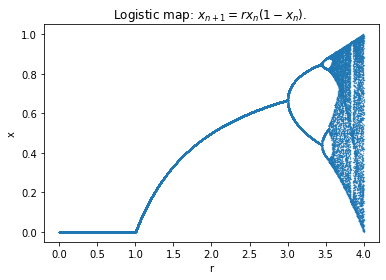

In [4]:
xs_amount = 100000

x = np.random.rand(xs_amount)
r = np.linspace(0, 4.0, num=xs_amount)

for i in range(1, 10000):
    inverted_x = 1 - x
    updated_x = np.multiply(x,r)
    updated_x = np.multiply(updated_x, inverted_x)
    x = updated_x

plt.title(r'Logistic map: $x_{n+1} = r x_{n} (1-x_{n}).$ ')
plt.ylabel('x')
plt.xlabel('r')
    
plt.scatter(r, x, s=0.1)
plt.show()